In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/teo/userdata/git_libraries/jgb-omr


In [2]:
import time
import glob
import csv
from tqdm import tqdm
import cv2
import numpy as np
from data_utils import JeongganboReader
import matplotlib.pyplot as plt

from exp_utils import read_jeongganbo, make_jeonggan_list, JeongganProcessor, COLOR_DICT, PNAME_LIST, SPECIAL_CHAR_TO_NAME

/home/teo/.local/share/virtualenvs/jgb-omr-AfDql38P/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load ext files and paths

**Daegeum**
* YeoMinRock score (p17~36)
* pitch names
* notations

In [3]:
jng_img_dir = 'test/split_pngs'
jng_img_paths = sorted(glob.glob(f'{jng_img_dir}/*.png'))
print('num jng imgs: ', len(jng_img_paths))

pattern_path_base = 'test/daegeum/'
# pattern_path_sub = ['notations/', 'pitches/']
pattern_path_sub = ['pitches/']
pattern_ext = '.png'

pattern_paths = { 
  subpath[:-1]: {
    path.replace(f'{pattern_path_base}{subpath}', '').replace(pattern_ext, ''): path \
    for path in sorted(glob.glob(f'{pattern_path_base}{subpath}*{pattern_ext}'))
  } for subpath in pattern_path_sub 
}

# print([ name for name in pattern_paths['notations'].keys() ])
print('ptrn key list: ', [ name for name in pattern_paths['pitches'].keys() ])

num jng imgs:  0
ptrn key list:  ['go', 'go_d', 'hwang', 'hwang_dd', 'hwang_ot', 'hwang_u', 'hwang_uu', 'hwnag_d', 'hyeop', 'hyeop_u', 'joong', 'joong_d', 'joong_dd', 'joong_u', 'lim', 'lim_d', 'lim_dd', 'lim_u', 'mu', 'mu_d', 'mu_u', 'nam', 'nam_d', 'nam_dd', 'nam_u', 'tae', 'tae_d', 'tae_dd', 'tae_u']


# **CONSTANTS**

In [4]:
THRESHOLD = 0.48
MATCH_MODE = cv2.TM_CCOEFF_NORMED
PTRN_SIZE = 48

PTRN_TEST_ORDER = [ 'go_d', 'go', 'hwang_dd', 'hwnag_d', 'hwang_uu', 'hwang_u', 'hwang_ot', 'hwang', 'hyeop_u', 'hyeop', 'joong_dd', 'joong_d', 'joong_u', 'joong', 'lim_dd', 'lim_d', 'lim_u', 'lim', 'mu_d', 'mu_u', 'mu', 'nam_dd', 'nam_d', 'nam_u', 'nam', 'tae_dd', 'tae_d', 'tae_u', 'tae' ]

PTRN_IMG_DICT = { name: cv2.imread(pattern_paths['pitches'][name]) for name in PTRN_TEST_ORDER }

jng_processor = JeongganProcessor(PTRN_SIZE, THRESHOLD, MATCH_MODE)

# result encoding with positional indices

**div 1 & div 3**

1 | 2 | 3

4 | 5 | 6

7 | 8 | 9


**div 2 : 1**

10

11

**div 2 : 2**

12 | 13

14 | 15

total num rows:  3
0 {'col_div': 1, 'cols': [(30, 7, 73, 43, 'lim_u')]}
1 None
2 {'col_div': 1, 'cols': [(31, 48, 70, 85, 'nam_d')]}

청임:2 배남:8 


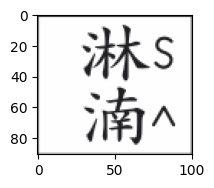

total num rows:  1
0 None




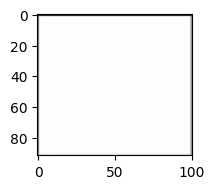

total num rows:  1
0 None




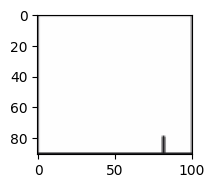

total num rows:  1
0 None




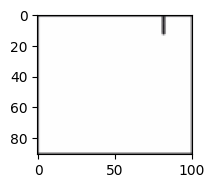

total num rows:  3
0 None
1 None
2 {'col_div': 1, 'cols': [(30, 50, 73, 86, 'lim_u')]}

청임:8 


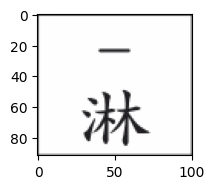

total num rows:  1
0 {'col_div': 1, 'cols': [(31, 26, 73, 62, 'go_d')]}

배고:5


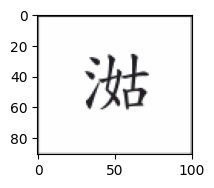

total num rows:  1
0 {'col_div': 1, 'cols': [(31, 25, 73, 61, 'tae_u')]}

청태:5


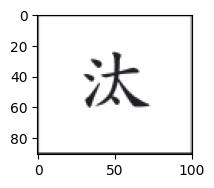

total num rows:  1
0 None




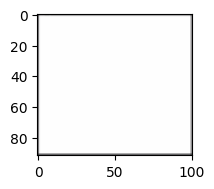

total num rows:  1
0 None




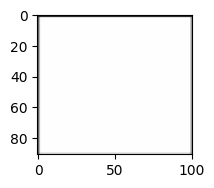

total num rows:  3
0 {'col_div': 1, 'cols': [(31, 8, 72, 41, 'mu_u')]}
1 None
2 {'col_div': 1, 'cols': [(31, 51, 74, 84, 'tae_u')]}

청무:2 청태:8 


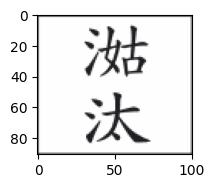

total num rows:  3
0 {'col_div': 1, 'cols': [(29, 6, 72, 43, 'hwang_dd')]}
1 None
2 {'col_div': 1, 'cols': [(33, 48, 69, 86, 'nam')]}

하배황:2 남:8 


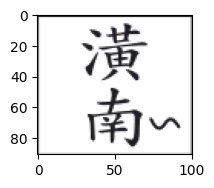

total num rows:  1
0 None




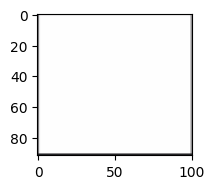

total num rows:  1
0 None




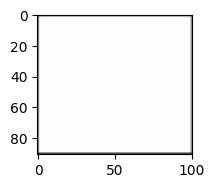

total num rows:  3
0 {'col_div': 1, 'cols': [(30, 7, 73, 43, 'lim_u')]}
1 None
2 {'col_div': 1, 'cols': [(31, 48, 70, 85, 'nam_d')]}

청임:2 배남:8 


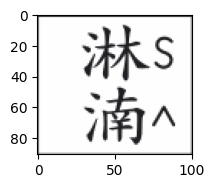

total num rows:  1
0 None




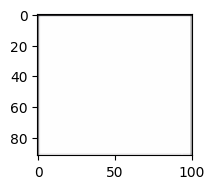

total num rows:  1
0 None




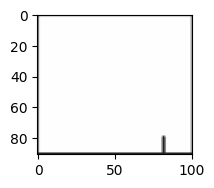

total num rows:  1
0 None




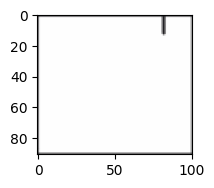

total num rows:  3
0 None
1 None
2 {'col_div': 1, 'cols': [(30, 50, 73, 86, 'lim_d')]}

배임:8 


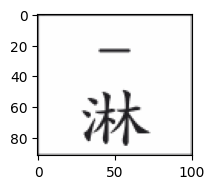

total num rows:  1
0 {'col_div': 1, 'cols': [(32, 26, 73, 62, 'go_d')]}

배고:5


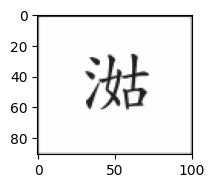

total num rows:  1
0 {'col_div': 1, 'cols': [(30, 23, 72, 64, 'hwang_u')]}

청황:5


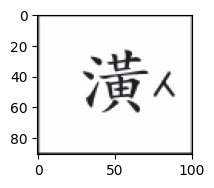

total num rows:  1
0 {'col_div': 1, 'cols': [(31, 25, 73, 61, 'tae_u')]}

청태:5


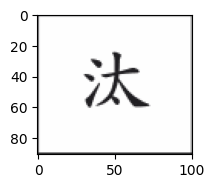

total num rows:  1
0 None




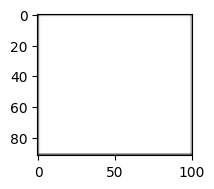

total num rows:  3
0 {'col_div': 1, 'cols': [(32, 8, 73, 40, 'go_d')]}
1 None
2 {'col_div': 2, 'cols': [None, (53, 51, 92, 86, 'lim_u')]}

배고:2 청임:9 


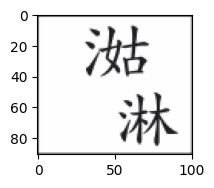

total num rows:  3
0 {'col_div': 1, 'cols': [(32, 9, 73, 41, 'go_d')]}
1 None
2 {'col_div': 1, 'cols': [(32, 50, 74, 83, 'tae_u')]}

배고:2 청태:8 


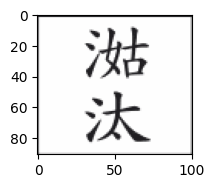

total num rows:  3
0 {'col_div': 1, 'cols': [(29, 6, 72, 43, 'hwang_u')]}
1 None
2 {'col_div': 1, 'cols': [(33, 50, 69, 88, 'nam')]}

청황:2 남:8 


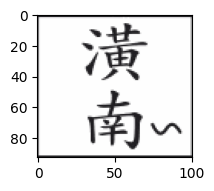

total num rows:  1
0 None




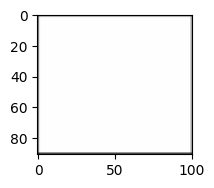

total num rows:  1
0 {'col_div': 1, 'cols': [(31, 25, 73, 61, 'go_d')]}

배고:5


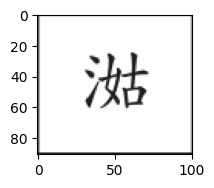

total num rows:  1
0 None




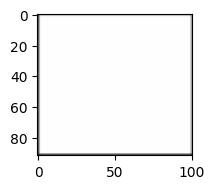

total num rows:  1
0 None




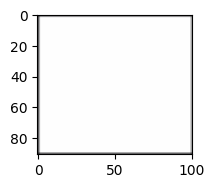

total num rows:  1
0 {'col_div': 1, 'cols': [(33, 21, 69, 63, 'nam_u')]}

청남:5


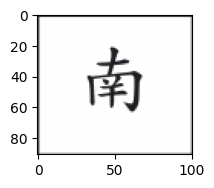

In [5]:
start = 1200
end = start + 30

for iter_idx, jng_img_path in enumerate(jng_img_paths[start:end]):
  filename = jng_img_path.split('/')[-1]
  title, inst_name, jng_idx = filename.split('_')
  jng_idx = jng_idx.replace('.png', '')
  
  jng_img = cv2.imread(jng_img_path)
  label, jng_aligned_result = jng_processor(jng_img, PTRN_IMG_DICT)

  print('total num rows: ', jng_aligned_result['row_div'])
  
  for row_idx, row in enumerate(jng_aligned_result['rows']):
    print(row_idx, row)
  
  print()
  print(label)
  
  plt.figure(figsize=(2, 2))
  plt.imshow(jng_img)
  plt.show()

## write jng info and label as .csv file

In [ ]:
with open(f'test/labels_{int(time.time())}.csv', 'w', newline='', encoding='utf-8') as f:
  writer = csv.writer(f)
  writer.writerow(['filename', 'title', 'inst_name', 'jng_idx', 'label'])
    
  for jng_img_path in tqdm(jng_img_paths, leave=False):
    filename = jng_img_path.split('/')[-1]
    title, inst_name, jng_idx = filename.split('_')
    jng_idx = jng_idx.replace('.png', '')
    
    jng_img = cv2.imread(jng_img_path)
    label, jng_aligned_result = jng_processor(jng_img, PTRN_IMG_DICT)
    
    writer.writerow([filename, title, inst_name, jng_idx, label])

## write label as .csv file (only :5 positions)

In [ ]:
with open(f'test/labels_{int(time.time())}.csv', 'w', newline='', encoding='utf-8') as f:
  writer = csv.writer(f)
  writer.writerow(['filename', 'title', 'inst_name', 'jng_idx', 'label'])
    
  for jng_img_path in tqdm(jng_img_paths, leave=False):
    filename = jng_img_path.split('/')[-1]
    title, inst_name, jng_idx = filename.split('_')
    jng_idx = jng_idx.replace('.png', '')
    
    jng_img = cv2.imread(jng_img_path)
    label, jng_aligned_result = jng_processor(jng_img, PTRN_IMG_DICT)
    
    if jng_aligned_result['row_div'] == 1 and label:
        writer.writerow([filename, title, inst_name, jng_idx, label])

## get labels from label studio annotations

In [5]:
def get_test_jng_filename_list(file, div_num, max_result=30):
  count = 0
  result = []
  
  for filename, annot in file.items():
    rows = [ line.strip().split(',') for line in annot.split('\n') ]
    
    if len(rows) == div_num:
      result.append(filename)
      count += 1
    
    if count > max_result:
      break
  
  return result

In [6]:
file = {}

# with open(f'test/label_studio_pairs_231205.csv', 'r', newline='', encoding='utf-8') as f:
with open(f'pairs.csv', 'r', newline='', encoding='utf-8') as f:
  reader = csv.reader(f, quotechar='"')
  file = { filename: annot for filename, annot in list(reader)[1:] }

In [7]:
pnames = ['황', '대', '태', '협', '고', '중', '유', '임', '이', '남', '무', '응']
octaves =  ['중청', '청', '배', '하배', '하하배']
pname_list = []

for pname in pnames:
  for octave in octaves:
    pname_list.append(octave + pname)

pname_list = pnames + pname_list

len(pname_list), len(pnames) * len(octaves) + len(pnames)

(72, 72)

In [8]:
jng_img_dir = 'jeongganbo-png/splited-pngs'

관악영산회상-가락덜이_daegeum_37.png
['청무', '-', '노라']
청무:2 -:5 노라:8


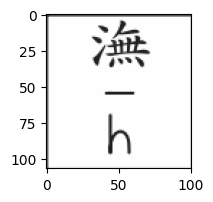

관악영산회상-가락덜이_daegeum_58.png
['청무', '-', '노']
청무:2 -:5 노:8


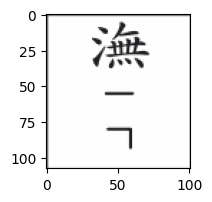

관악영산회상-가락덜이_daegeum_73.png
['청임', '-', '같은음표 나니나']
청임:2 -:5 같은음표_나니나:8


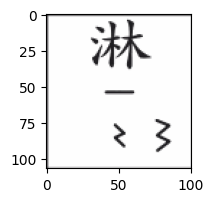

관악영산회상-가락덜이_piri_12.png
['무', '-', '황']
무:2 -:5 황:8


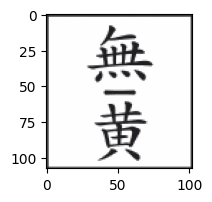

관악영산회상-가락덜이_piri_16.png
['- )', '-', '중']
-_퇴성:2 -:5 중:8


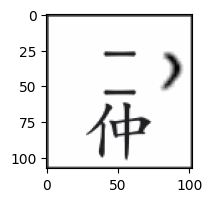

관악영산회상-상령산_daegeum_191.png
['-', '-, 노', '청무 느니르 떠이어표']
-:2 -:4 노:6 청무_느니르_떠이어표:8


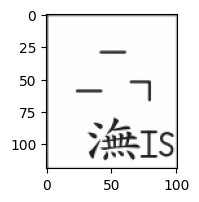

관악영산회상-상령산_daegeum_196.png
['청황, 청중', '-, 노라', '니']
청황:1 청중:3 -:4 노라:6 니:8


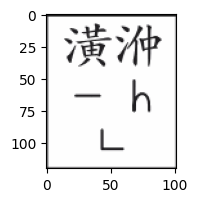

관악영산회상-상령산_daegeum_212.png
['청중', '-, 노라', '니']
청중:2 -:4 노라:6 니:8


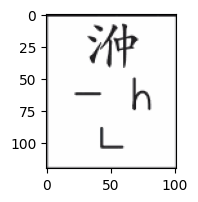

관악영산회상-상령산_daegeum_238.png
['청황, 청중', '-, 노라', '니']
청황:1 청중:3 -:4 노라:6 니:8


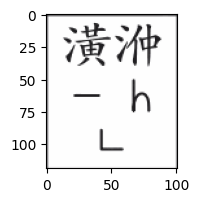

관악영산회상-상령산_daegeum_239.png
['청황', '-, 니나', '무 )']
청황:2 -:4 니나:6 무_퇴성:8


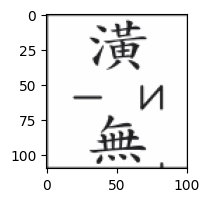

관악영산회상-상령산_daegeum_245.png
['-', '-, 청중', '청태, 청황']
-:2 -:4 청중:6 청태:7 청황:9


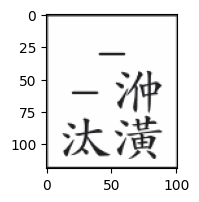

관악영산회상-상령산_daegeum_248.png
['청태 ㄷ', '-, 니', '청임, 청무']
청태_나니로:2 -:4 니:6 청임:7 청무:9


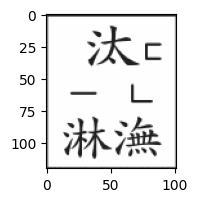

관악영산회상-상령산_daegeum_250.png
['청중', '- )', '청태 나니나']
청중:2 -_퇴성:5 청태_나니나:8


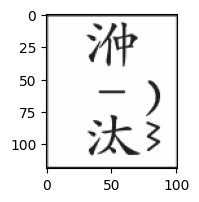

관악영산회상-상령산_daegeum_253.png
['임 노니로', '-, 노', '무 느니르']
임_노니로:2 -:4 노:6 무_느니르:8


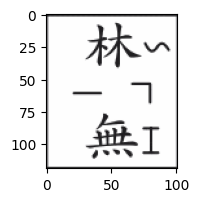

관악영산회상-상령산_daegeum_257.png
['청태 ㄷ', '-, 청중', '느니']
청태_나니로:2 -:4 청중:6 느니:8


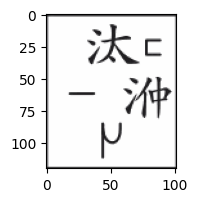

관악영산회상-상령산_daegeum_56.png
['청임, 청무', '-', '-, 니나']
청임:1 청무:3 -:5 -:7 니나:9


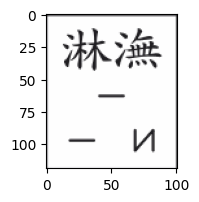

관악영산회상-상령산_daegeum_69.png
['청임 )', '청무', '- ?']
청임_퇴성:2 청무:5 -_?:8


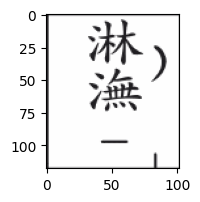

관악영산회상-상령산_haegeum_106.png
['임 니레', '중', '-']
임_니레:2 중:5 -:8


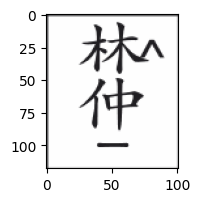

관악영산회상-상령산_haegeum_118.png
['황, 중', '- (', '황 노니로']
황:1 중:3 -_추성:5 황_노니로:8


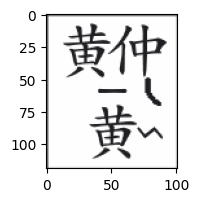

관악영산회상-상령산_haegeum_138.png
['황', '-', '태']
황:2 -:5 태:8


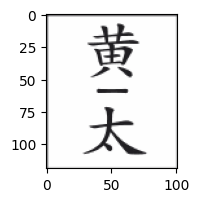

관악영산회상-상령산_haegeum_212.png
['임 니레', '중', '-']
임_니레:2 중:5 -:8


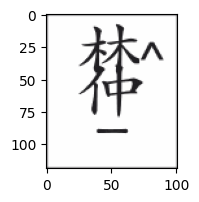

관악영산회상-상령산_haegeum_237.png
['임', '- )', '중']
임:2 -_퇴성:5 중:8


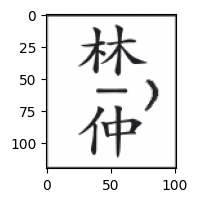

관악영산회상-상령산_haegeum_76.png
['배임', '- )', '배무 끊는표']
배임:2 -_퇴성:5 배무_끊는표:8


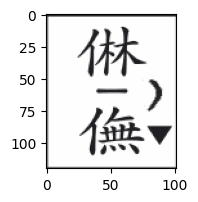

관악영산회상-상령산_haegeum_98.png
['황, 중', '- (', '황 노니로']
황:1 중:3 -_추성:5 황_노니로:8


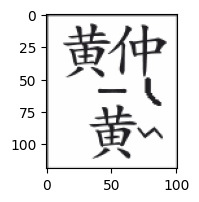

관악영산회상-상령산_piri_167.png
['-', '-', '황 ㅅ, 태 2']
-:2 -:5 황_ㅅ:7 태_2:9


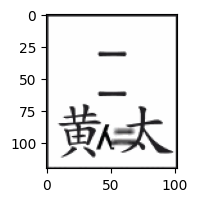

관악영산회상-상령산_piri_270.png
['배임 7', '배임 8', '-, 배무 니나 2 7']
배임_7:2 배임_8:5 -:7 배무_니나_2_7:9


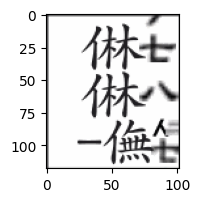

관악영산회상-상현도드리_daegeum_109.png
['청중', '- 노라', '청협']
청중:2 -_노라:5 청협:8


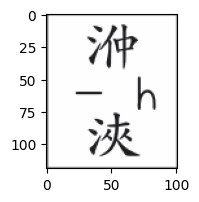

관악영산회상-상현도드리_daegeum_190.png
['청중', '-, 노라', '청협']
청중:2 -:4 노라:6 청협:8


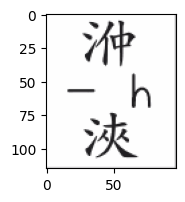

관악영산회상-상현도드리_daegeum_33.png
['청임', '-', '같은음표, 나니나']
청임:2 -:5 같은음표:7 나니나:9


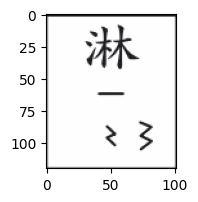

관악영산회상-상현도드리_daegeum_34.png
['청중', '-, 노라', '청협']
청중:2 -:4 노라:6 청협:8


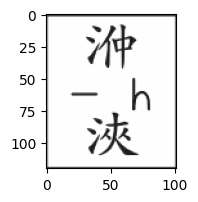

관악영산회상-상현도드리_daegeum_72.png
['청무', '-', '노라']
청무:2 -:5 노라:8


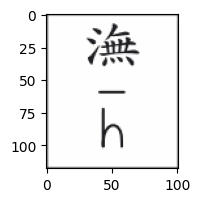

In [9]:
test_jng_filenames = get_test_jng_filename_list(file, 3)

def combine_chars(char_list):
  pname = ''
  notations = []
  
  for char in char_list:
    if char in PNAME_LIST:
      pname = char
    else:
      if char in SPECIAL_CHAR_TO_NAME.keys():
        notations.append(SPECIAL_CHAR_TO_NAME[char])
      else:
        notations.append(char)
  
  pname = [pname] if pname else []
  
  return '_'.join(pname + notations)


for filename in test_jng_filenames:
  annot = file[filename]

  print(filename)
  rows = annot.split('\n')
  row_div = len(rows)
  print(rows)
  
  result_str = ''
  result_list = []
  
  if row_div == 1:
    chars = rows[0].strip().split(' ')
    char_str = combine_chars(chars)
    result_str = char_str + ':5'
  
  else:
    for row_idx, row in enumerate(rows):
      cols = row.strip().split(',')
      
      if len(cols) == 1:
        chars = cols[0].strip().split(' ')
        char_str = combine_chars(chars)
        position = row_idx + 10 if row_div == 2 else 2 + (row_idx * 3)
        result_list.append(char_str + f':{position}')
        
      else:
        for col_idx, col in enumerate(cols):
          chars = col.strip().split(' ')
          char_str = combine_chars(chars)
          position = 12 + (row_idx * 2) + col_idx if row_div == 2 else 1 + (row_idx * 3) + (col_idx * 2)
          result_list.append(char_str + f':{position}')
      
    result_str = ' '.join(result_list)

  print(result_str)
  
  plt.figure(figsize=(2, 2))
  plt.imshow(cv2.imread(f'{jng_img_dir}/{filename}'))
  plt.show()


## convert label_studio_annotations to label with positional indices and write

In [10]:
def combine_chars(char_list):
  pname = ''
  notations = []
  
  for char in char_list:
    if char in PNAME_LIST:
      pname = char
    else:
      if char in SPECIAL_CHAR_TO_NAME.keys():
        notations.append(SPECIAL_CHAR_TO_NAME[char])
      else:
        notations.append(char)
  
  pname = [pname] if pname else []
  
  return '_'.join(pname + notations)

file = []

# with open(f'test/label_studio_pairs_231205.csv', 'r', newline='', encoding='utf-8') as f:
with open(f'pairs.csv', 'r', newline='', encoding='utf-8') as f:
  reader = csv.reader(f, quotechar='"')
  file = list(reader)[1:]

with open(f'test/labels_from_label_studio_{int(time.time())}.csv', 'w', newline='', encoding='utf-8') as f:
  writer = csv.writer(f)
  writer.writerow(['filename', 'title', 'inst_name', 'jng_idx', 'label'])
  
  for filename, annot in tqdm(file, leave=False):
    title, inst_name, jng_idx = filename.split('_')
    jng_idx = jng_idx.replace('.png', '')
    
    rows = annot.split('\n')
    row_div = len(rows)
    
    result_str = ''
    result_list = []
    
    if row_div == 1:
      chars = rows[0].strip().split(' ')
      char_str = combine_chars(chars)
      result_str = char_str + ':5'
    
    else:
      for row_idx, row in enumerate(rows):
        cols = row.strip().split(',')
        
        if len(cols) == 1:
          chars = cols[0].strip().split(' ')
          char_str = combine_chars(chars)
          position = row_idx + 10 if row_div == 2 else 2 + (row_idx * 3)
          result_list.append(char_str + f':{position}')
          
        else:
          for col_idx, col in enumerate(cols):
            chars = col.strip().split(' ')
            char_str = combine_chars(chars)
            position = 12 + (row_idx * 2) + col_idx if row_div == 2 else 1 + (row_idx * 3) + (col_idx * 2)
            result_list.append(char_str + f':{position}')
        
      result_str = ' '.join(result_list)
    
    writer.writerow([filename, title, inst_name, jng_idx, result_str])